# Projekt MSP1 / 2024
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 27. 10. 2024 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Ondřej Bahounek xbahou00_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [143]:
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        if not filename.endswith("json"):
            continue
        with zf.open(filename, "r") as f:
            content = f.read()
            data.append(json.loads(content))

df = pd.DataFrame(data)
df['status'] = df['status'].astype("category")
df['configuration'] = df['configuration'].astype("category")
df

,configuration,run,runtime,status
0,config6,149,53.733556,SUCCESS
1,config2,16,134.543496,SUCCESS
2,config6,180,117.108040,SUCCESS
3,config4,12,223.763044,SUCCESS
4,config5,193,159.540473,SUCCESS
...,...,...,...,...
1195,config5,95,199.461297,SUCCESS
1196,config5,99,155.491930,SUCCESS
1197,config2,83,125.243690,SUCCESS
1198,config5,153,223.312938,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

Statistiky každé konfigurace:
               count        mean         std       min         25%  \
configuration                                                        
config1        200.0  123.104749  208.128584  0.000000   92.716828   
config2        200.0  167.456980  166.009023  0.000000  137.883249   
config3        200.0  144.151535  120.874132  0.000000  123.891821   
config4        200.0  143.054033  174.673555  0.000000   93.049865   
config5        200.0  198.904871  164.334180  0.000000  163.910896   
config6        200.0  118.870575  126.237033  2.124534   81.741231   

                      50%         75%     max  
configuration                                  
config1         99.799944  105.008525  1800.0  
config2        151.576787  165.004250  1800.0  
config3        138.038496  151.533715  1800.0  
config4        129.975246  165.023842  1800.0  
config5        183.916111  201.549486  1800.0  
config6        111.088189  137.889290  1800.0  

Objevují se nulové hodno

<Axes: xlabel='runtime', ylabel='Count'>

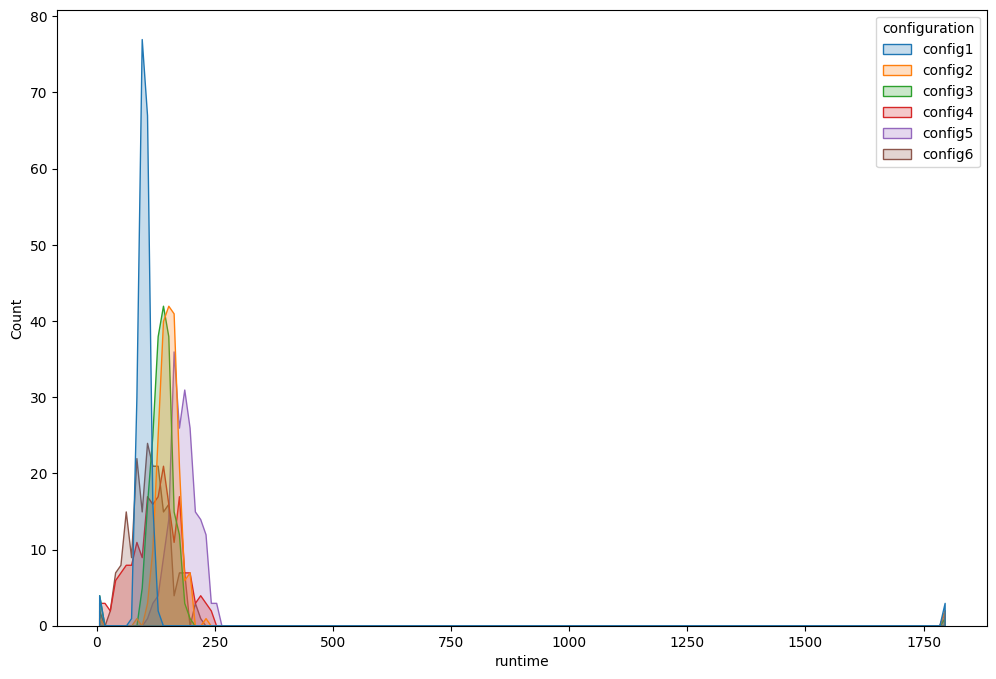

In [144]:
summary_stats = df.groupby('configuration',observed=False)['runtime'].describe()
print("Statistiky každé konfigurace:")
print(summary_stats)

print("")
print("Objevují se nulové hodnoty času")
zero_time = df[df['runtime'] == 0]
print("Pro všechny je společný status:")
print(zero_time['status'].unique())

print("")
print(f"U každé configurace jsou běhy, které nedoběhly a ukončil je timelimit = {df['runtime'].max()}")

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='runtime', hue='configuration', element='poly', stat='count', common_norm=False)

print(f"Dle histogramu se data zdají být prvky náhodných rozložení.")


__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_


Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Odstraníme běhy, které nezačali nebo neskončily
Statistiky každé konfigurace:
               count        mean        std         min         25%  \
configuration                                                         
config1        193.0   99.590413   9.386788   73.802549   92.979469   
config2        197.0  151.732975  19.833198   85.174653  137.995662   
config3        195.0  138.616959  19.867428   90.567110  124.803901   
config4        196.0  127.606156  50.282164    4.970286   94.793688   
config5        197.0  183.659767  28.729836  107.283620  164.070091   
config6        199.0  110.422689  40.875754    2.124534   81.656211   

                      50%         75%         max  
configuration                                      
config1         99.865028  104.824724  127.201692  
config2        151.516091  163.802880  227.054630  
config3        138.678404  151.536291  201.577616  
config4        129.975246  164.327163  241.987620  
config5        183.843132  201.250693  25

C:\Users\Bahno\AppData\Local\Temp\ipykernel_14832\2655903440.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean_summary_stats = clean_df.groupby('configuration')['runtime'].describe()


<Axes: xlabel='runtime', ylabel='Count'>

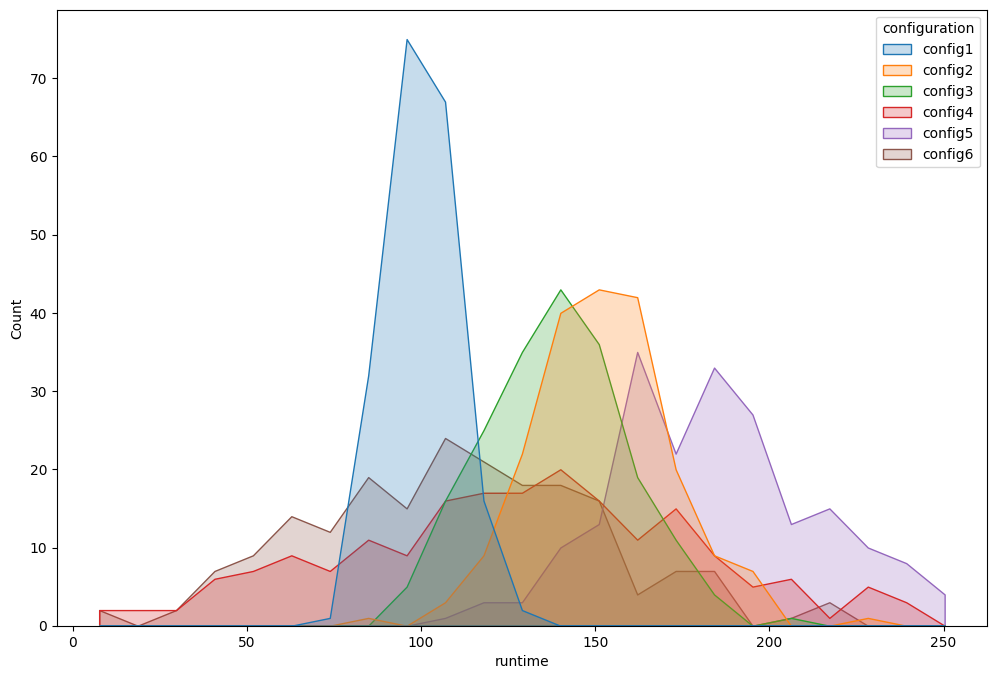

In [145]:
print("Odstraníme běhy, které nezačali nebo neskončily")
clean_df = df[df['status'] == 'SUCCESS']

clean_summary_stats = clean_df.groupby('configuration')['runtime'].describe()
print("Statistiky každé konfigurace:")
print(clean_summary_stats)
print((summary_stats - clean_summary_stats)['mean'].mean())

print("")
print("V důsledku odstanění chybných hodnot s time limitem, se zcela zásadně snížila střední hodnota a především směrodatná odchylka.")
print(f"Střední hodnota v průměru o {(summary_stats - clean_summary_stats)['mean'].mean():.2f}. Směrodatná odchylka v průměru o {(summary_stats - clean_summary_stats)['std'].mean():.2f}.")


plt.figure(figsize=(12, 8))
sns.histplot(data=clean_df, x='runtime', hue='configuration', element='poly', stat='count', common_norm=False)

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [146]:
# TODO

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

In [147]:
# TODO

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. 

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vybraného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

In [148]:
# TODO: Implementace s využitím knihovní funkcí


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [149]:
# TODO vlastni implementace zvoleneho testu